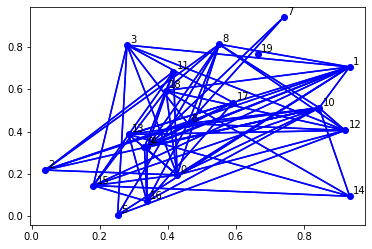

In [1]:
import numpy as np
import algos.graphdrawing as gd
      
V, adj_V = gd.gen_graph(num_verts=20, max_nbrs=10)
gd.draw(V, adj_V)

# Edge-Edge Repulsion (Lin & Yen, 2012)
Apply forces based on the angle formed by incident edges.

Angular resolution: 0.5377247755633342


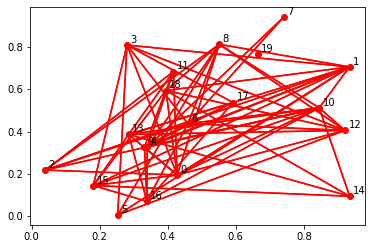

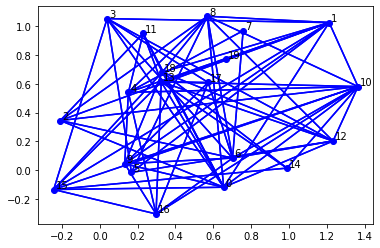

Angular resolution: 0.6011881078586593


In [2]:
import algos.lin_yen as ly
import algos.geometry as geo
import matplotlib.pyplot as plt
from importlib import reload

reload(ly)
gd.draw(V, adj_V, 'r')
print(f'Angular resolution: {geo.get_angular_res(V, adj_V)}')
W = ly.ee_repulsion(V, adj_V, C0=1, C1=0.01)
plt.show()

gd.draw(W, adj_V)
plt.show() 

print(f'Angular resolution: {geo.get_angular_res(W, adj_V)}')

# Force-directed edge-vertex repulsion

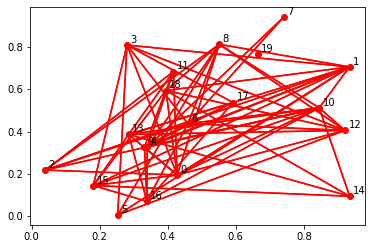

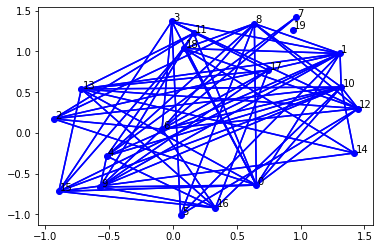

In [3]:
import numpy as np
import math
import algos.lin_yen as ly

      
gd.draw(V, adj_V, 'r')
plt.show()
W = ly.ev_repulsion(V, adj_V, N=10, C1=1, C2=1, C3=0.001)
gd.draw(W, adj_V)
plt.show()

# Vertex-vertex repulsion (Birchfield & Overbye, 2018)

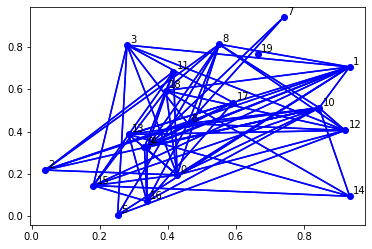

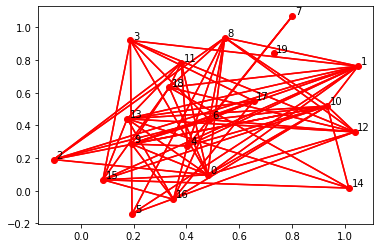

In [4]:
import algos.birchfield as bf
import algos
from importlib import reload

reload(algos.birchfield)
gd.draw(V, adj_V, 'b')
plt.show()
W = bf.force_directed(V, adj_V, N=10, C1=2, C2=0.1, C3=0.005)
gd.draw(W, adj_V, 'r')

# Line intersections

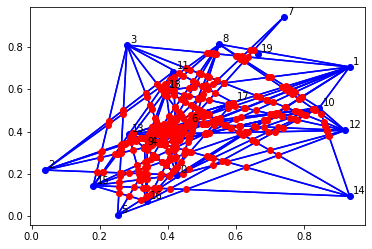

In [5]:
import matplotlib.pyplot as plt
from importlib import reload

ints = geo.get_intersects(V, adj_V)
gd.draw(V, adj_V, 'b')
C = np.array([c['intersection'] for c in ints])
plt.plot(C[:,0], C[:,1], 'ro')
plt.show()

# Used later for cross resolution maximization

# Algorithm for Cross Angular Resolution

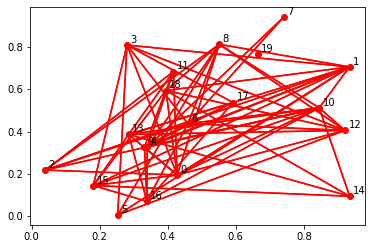

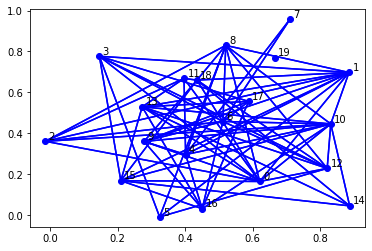

In [6]:
reload(ly)
W = ly.cross_repulsion(V, adj_V, N=15, C0=1, C1=0.001, C2=0.001)
gd.draw(V, adj_V, 'r')
plt.show()
gd.draw(W, adj_V)
plt.show()

# BIGANGLE

Original graph V


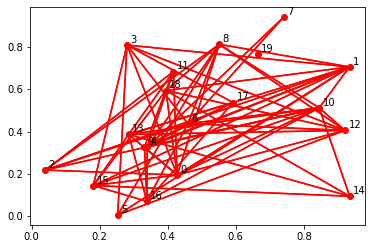

Big angle without forces to original positions


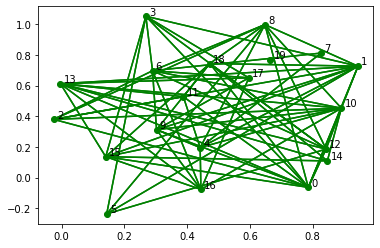

Big angle with forces to original positions


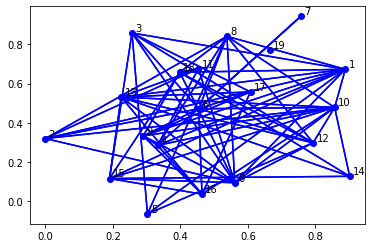

Combined


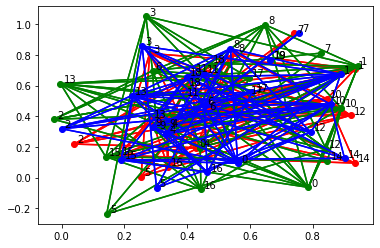

In [60]:
import algos.lin_yen as ly

reload(ly)
print('Original graph V')
gd.draw(V, adj_V, 'r')
plt.show()

print('Big angle without forces to original positions')
W1 = ly.bigangle(V, adj_V, N=15, C0=1, C1=0.01, C2=1, C3=0.001, F2V=False)
gd.draw(W1, adj_V, 'g')
plt.show()

print('Big angle with forces to original positions')
W2 = ly.bigangle(V, adj_V, N=15, C0=500, C1=0.01, C2=1, C3=0.001, F2V=True)
gd.draw(W2, adj_V, 'b')
plt.show()

print('Combined')
gd.draw(V, adj_V, 'r')
gd.draw(W1, adj_V, 'g')
gd.draw(W2, adj_V, 'b')
plt.show()

# Map dingetjes

In [9]:
import pandas as pd
import geopandas as gpd

# Haal de kaart met gemeentegrenzen op van PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
gemeentegrenzen = gpd.read_file(geodata_url)

<AxesSubplot:>

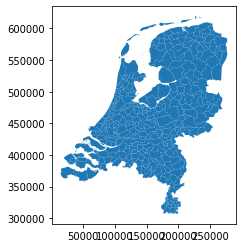

In [10]:
gemeentegrenzen.plot()

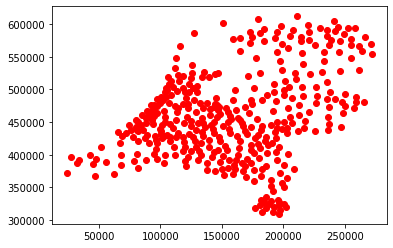

In [57]:
cents = [gem.centroid.xy for gem in gemeentegrenzen['geometry']]
cents = np.array(cents)
plt.plot(cents[:,0], cents[:,1], 'ro')
plt.show()

# Data from Json

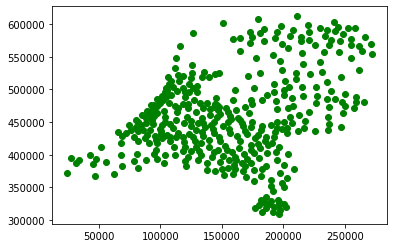

In [61]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open('./algos/odf_data/NL_muni_point.geojson') as X:
  X = json.load(X)
  X = [x['geometry']['coordinates'] for x in X['features']]
  X = np.array(X)
  plt.plot(X[:,0], X[:,1], 'go')
  plt.show()

# Displacement measure & simple visualization
Darker the 

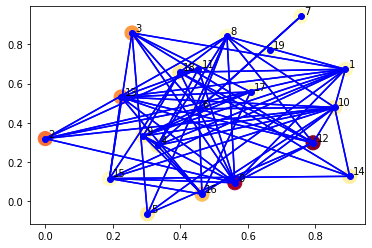

In [96]:
import algos.geometry as geo
from importlib import reload

reload(geo)
disps = geo.get_displacement(V, W)
assert(len(disps) == len(V))
gd.draw(W2, adj_V, 'b')
plt.scatter(x=W2[:,0], y=W2[:,1], c=disps, s=200, cmap='YlOrRd')
plt.show()